In [29]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [30]:
# Amr Ahmed ---> DL (Titanic Dataset)

In [31]:
from google.colab import files
uploaded = files.upload()

Saving Copy of titanic.csv to Copy of titanic (1).csv


In [32]:
data = pd.read_csv('Copy of titanic.csv')

In [33]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [34]:
data = data.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [35]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [36]:
data['Age'].fillna(data['Age'].mean(), inplace=True)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

In [37]:
data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [38]:
data.duplicated().sum()

111

In [39]:
data = data.drop_duplicates()

In [40]:
data.duplicated().sum()

0

In [41]:
label_encoder_sex = LabelEncoder()
data['Sex'] = label_encoder_sex.fit_transform(data['Sex'])

In [42]:
label_encoder_embarked = LabelEncoder()
data['Embarked'] = label_encoder_embarked.fit_transform(data['Embarked'])

In [43]:
data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [44]:
x = data.drop('Survived', axis=1)
y = data['Survived']

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [46]:
model = Sequential()

model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))

model.add(Dense(32, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [47]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [48]:
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test))

Epoch 1/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.5552 - loss: 0.9276 - val_accuracy: 0.6474 - val_loss: 0.6907
Epoch 2/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6256 - loss: 0.6939 - val_accuracy: 0.6538 - val_loss: 0.6455
Epoch 3/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6760 - loss: 0.6207 - val_accuracy: 0.6667 - val_loss: 0.6666
Epoch 4/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6936 - loss: 0.5857 - val_accuracy: 0.6538 - val_loss: 0.6737
Epoch 5/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6670 - loss: 0.6429 - val_accuracy: 0.6603 - val_loss: 0.6642
Epoch 6/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6978 - loss: 0.5616 - val_accuracy: 0.6603 - val_loss: 0.6136
Epoch 7/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6870 - loss: 0.5685 - val_accuracy: 0.6410 - val_loss: 0.6239
Epoch 8/50
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6980 - loss: 0.5692 - val_accuracy: 0.6603 - val_loss

In [49]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss}, Test Accuracy: {test_accuracy}')

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7461 - loss: 0.5331 
Test Loss: 0.5288631319999695, Test Accuracy: 0.7564102411270142


Epoch 1/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7709 - loss: 0.5414 - val_accuracy: 0.7500 - val_loss: 0.5601
Epoch 2/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7868 - loss: 0.4924 - val_accuracy: 0.7308 - val_loss: 0.5829
Epoch 3/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7542 - loss: 0.4956 - val_accuracy: 0.6987 - val_loss: 0.9209
Epoch 4/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7365 - loss: 0.7040 - val_accuracy: 0.7244 - val_loss: 0.6579
Epoch 5/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7737 - loss: 0.5243 - val_accuracy: 0.7821 - val_loss: 0.5037
Epoch 6/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7818 - loss: 0.4741 - val_accuracy: 0.7436 - val_loss: 0.5596
Epoch 7/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7778 - loss: 0.5108 - val_accuracy: 0.6987 - val_loss: 0.6985
Epoch 8/50
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7993 - loss: 0.5072 - val_accuracy: 0.7821 - val_loss:

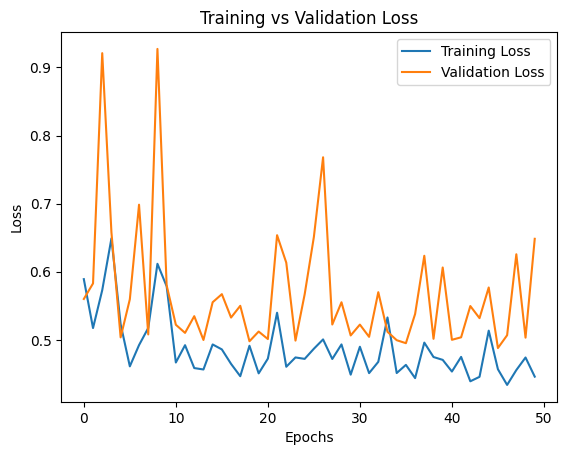

In [50]:
import matplotlib.pyplot as plt

# Train the model and store the history
history = model.fit(x_train, y_train, epochs=50, batch_size=10, validation_data=(x_test, y_test))

# Plot the training loss and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
